In [120]:
import pandas as pd
import numpy as np
import random as random

# plotly standard imports
import plotly.graph_objs as go
import plotly.plotly as py
from datetime import datetime
from sklearn.metrics import mean_squared_error



In [121]:
import itertools
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore") 

In [122]:
# Cufflinks wrapper on plotly
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot
cufflinks.go_offline()

# Set global theme
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.figure_factory as ff



In [123]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [124]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [125]:
data=pd.read_excel("Projekt 3 - Hedge Dane.xls", sep=";")

In [126]:
data["CombinedPortfolio"]=data.Portfolio1SP+data.Portfolio2DJ
data["SP500_ret"]=data.SP500.pct_change()
data["DJIA_ret"]=data.DJIA.pct_change()
data["Portfolio1SP_ret"]=data.Portfolio1SP.pct_change()
data["Portfolio2DJ_ret"]=data.Portfolio2DJ.pct_change()
data["CombinedPortfolio_ret"]=data.CombinedPortfolio.pct_change()

In [127]:
df_train=data[(data.Date<"2019-01-01")]
df_test=data[(data.Date>="2019-01-01")]

In [128]:
df_train=df_train[3:-1]

In [129]:

df_train.set_index(keys="Date",inplace=True)

In [130]:
corrs = df_train[['SP500_ret', 'DJIA_ret',
       'Portfolio1SP_ret', 'Portfolio2DJ_ret', 'CombinedPortfolio_ret']].corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.layout.margin=dict(l = 200)

# Correlation between weekly returns of Portfolios and Indexes

In [131]:
iplot(figure)

Although single Portfolios tend to have correlation with indexes around 0.5-0.7, when both of them are combined into one single portfolio it has stronger correlation with the market indexes in range of 0.75-0.77. This proves that both porfolios have different return characterics and combining them together can serve as first part of hedging. 

# Aurocorrelation of SP500 weekly returns [PACF]

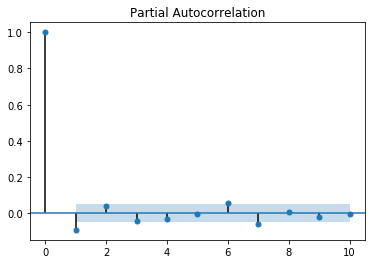

In [132]:
#we use tra.diff()(differenced data), because this time series is unit root process.

fig = sm.graphics.tsa.plot_pacf(df_train.SP500_ret, lags=10)

fig.show()

# Autocorrelation of DJIA weekly returns [PACF]

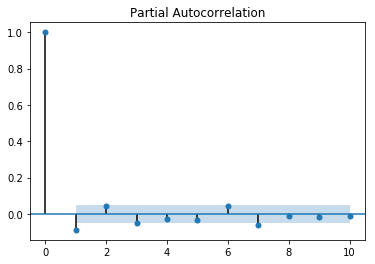

In [133]:

fig = sm.graphics.tsa.plot_pacf(df_train.DJIA_ret, lags=10)

fig.show()

# Autocorrelation of Combined Porfolio weekly returns [PACF]

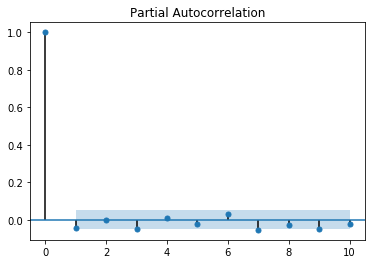

In [134]:

fig = sm.graphics.tsa.plot_pacf(df_train.CombinedPortfolio_ret, lags=10)
fig.show()

In [135]:

trace0=go.Scatter3d(
        x=df_train.SP500_ret,
        y=df_train.DJIA_ret,
        z=df_train.CombinedPortfolio_ret,
        mode='markers',
        marker=dict(
       
        colorscale="Jet",
        color=df_train.CombinedPortfolio_ret,
        showscale=True,
        size=8,
        opacity=0.8
        )
    )

data=[trace0]

figure=go.Figure(
    data=data,
    layout=go.Layout(
        scene=dict(
            xaxis=dict(title="SP500 returns"),
            yaxis=dict(title="DJIA returns"),
            zaxis=dict(title="Porfolio returns")
           
                  ),
         title="Correlation between Portfolio returns and Market Indexes"
    ))
iplot(figure)


# Correlation between SP500 and Portfolio returns

In [136]:

trace0=go.Scatter(
        y=df_train.SP500_ret,
        x=df_train.CombinedPortfolio_ret,
        mode='markers',
        marker=dict(
        color="blue",
        size=10,
        opacity=0.2
        )
    )




data=[trace0]
figure=go.Figure(
    data=data,
    layout=go.Layout(
        title="Correlation between SP500 and Portfolio returns",
        xaxis=dict(title="SP500_returns"),
        yaxis=dict(title="Portfolio_Returns"),

    
    ))
iplot(figure)

# Correlation between SP500 and DJIA returns


In [137]:

trace0=go.Scatter(
        y=df_train.SP500_ret,
        x=df_train.DJIA_ret,
        mode='markers',
        marker=dict(
        color="blue",
        size=10,
        opacity=0.2
        )
    )




data=[trace0]
figure=go.Figure(
    data=data,
    layout=go.Layout(
        title="Correlation between DJIA and Portfolio returns",
        xaxis=dict(title="SP500_returns"),
        yaxis=dict(title="DJIAa_Returns"),

    
    ))
iplot(figure)

# Correlation between DJIA and both Porfolios

In [138]:

trace0=go.Scatter(
        y=df_train.DJIA_ret,
        x=df_train.Portfolio1SP_ret,
        mode='markers',
        marker=dict(
        color="red",
        size=10,
        opacity=0.1
        ),
        name="Returns Porfolio1SP"
    )

trace1=go.Scatter(
        y=df_train.DJIA_ret,
        x=df_train.Portfolio2DJ_ret,
        mode='markers',
        marker=dict(
        color="blue",
        size=10,
        opacity=0.1
        ),
        name="Returns Porfolio2DJ"
    )



data=[trace0,trace1]
figure=go.Figure(
    data=data,
    layout=go.Layout(
        title="Correlation between DJIA and both Porfolios",
        xaxis=dict(title="SP500_returns"),
        yaxis=dict(title="Portfolio_Returns"),

    
    ))
iplot(figure)

# Combined portfolio weekly returns

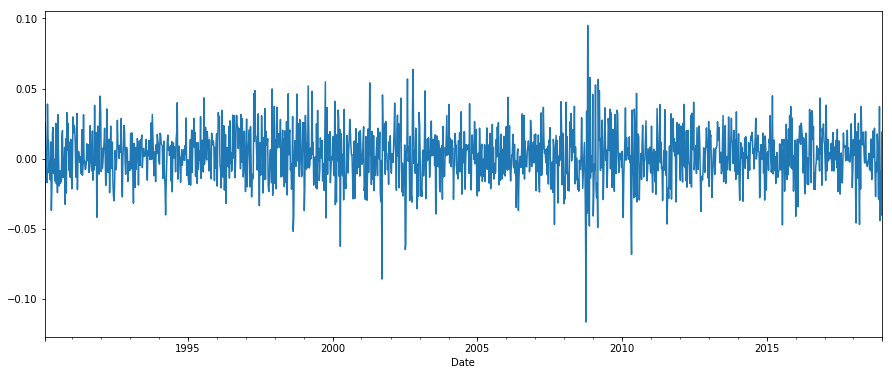

In [139]:
y3=df_train.CombinedPortfolio_ret
y3.plot(figsize=(15, 6))

In [140]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))


In [141]:
exog=df_train[["SP500_ret","DJIA_ret"]]

Grid search for best combination of ARIMA parameters

In [142]:
print("ARIMAX parameters, Akaike criterion ")

best_result3 = [0, 10000000]
for param in pdq:
    try:

            mod = sm.tsa.statespace.SARIMAX(endog=y3,
                                            exog=exog,
                                            order=param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                            trend='c'
                                            
                                           )

            results = mod.fit()
            
#             print('ARIMA{} x {} - AIC: {}'.format(param, param_seasonal, results.aic))

            if results.aic < best_result3[1]:
                best_result3 = [param, results.aic]
            print (param, results.aic)
    except:
        continue

            
print('\nBest Result:', best_result3)

ARIMAX parameters, Akaike criterion 
(0, 0, 0) -9082.18607960857
(0, 0, 1) -9074.556565129664
(0, 1, 0) -8040.47173567828
(0, 1, 1) -9032.79934210956
(1, 0, 0) -9080.233327340258
(1, 0, 1) -9070.896120784157
(1, 1, 0) -8490.041630069969
(1, 1, 1) -9008.678601066349

Best Result: [(0, 0, 0), -9082.18607960857]


# Strong corelation with regressors made  autoregression negligible. Regression with market indexes is the  key determinants of analyzed portfolio's return

In [143]:
mod3 = sm.tsa.statespace.SARIMAX(endog=y3,
                                exog=exog,
                                order=(best_result3[0][0], best_result3[0][1], best_result3[0][2]),
                                enforce_stationarity=False,
                                enforce_invertibility=False,
                                seasonal_order=(0, 0, 0, 0),
                                trend='c'
                                )

results3 = mod3.fit()

print(results3.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0010      0.000      3.268      0.001       0.000       0.002
SP500_ret      0.1473      0.043      3.432      0.001       0.063       0.231
DJIA_ret       0.5071      0.044     11.476      0.000       0.420       0.594
sigma2         0.0001   5.37e-06     26.373      0.000       0.000       0.000


Forecast of Combined Porfolio weekly returns depends strongly on performance of SP500 and DJIA which made the autoregressive part negligible in comparison to strong regression with indexes. Our porfolio has average return higher than the indexes by 0.1% weekly which is statisticaly proven by the intercept. Apart from intercept Porfolio's performance is described as 0.15*returns from SP500+0.5 returns from DJIA. It tends to have lower changes than the indexes used as regressors as both coefficients add up to 0.65 which suggests the porfolio to be less viotile than the market indexes. 

# Results comparison with linear regression

In [144]:
reg=LinearRegression(fit_intercept=True).fit(exog,y3)


Coefficients (DJIA_ret, SP500_ret)

In [145]:
reg.coef_

array([0.14818767, 0.50275206])

Intercept

In [146]:
reg.intercept_


0.0010095510643686682

In [147]:
df_pred=df_train[["DJIA_ret","SP500_ret","CombinedPortfolio_ret"]]
df_pred_test=df_test[["DJIA_ret","SP500_ret","CombinedPortfolio_ret"]]
df_pred["Portfolio"]=np.NaN

In [148]:
df_grid=pd.DataFrame(np.zeros((80*80,4)),columns=["share_of_DJIA","share_of_SP500","Portfolio_Variance","Mean_return"])

In [149]:
k=0
for i in range(-40,40):
    for j in range(-40,40):
        df_pred["Portfolio"]=0
        df_pred["Portfolio"]=df_pred.CombinedPortfolio_ret+i/40*df_pred.DJIA_ret+j/40*df_pred.SP500_ret
        
        
        df_grid["share_of_DJIA"][k]=i/40
        df_grid["share_of_SP500"][k]=j/40
        df_grid["Portfolio_Variance"][k]=df_pred.Portfolio.var()
        df_grid["Mean_return"][k]=df_pred.Portfolio.mean()
        k=k+1

In [150]:
z_data=df_grid[["share_of_DJIA","share_of_SP500","Portfolio_Variance"]]
z_data=z_data.pivot(index="share_of_DJIA", columns="share_of_SP500", values="Portfolio_Variance")
z=z_data.values


In [151]:
c_data=df_grid[["share_of_DJIA","share_of_SP500","Mean_return"]]
c_data=c_data.pivot(index="share_of_DJIA", columns="share_of_SP500", values="Mean_return")
c=c_data.values

In [152]:
y=z_data.index
x=df_grid.share_of_SP500


# Data visualization confirms high efficiency of chosen hedging approach both with historical and 2019 data

In [153]:

trace0=go.Scatter(
        y=df_grid.Mean_return,
        x=df_grid.Portfolio_Variance,
        mode='markers',
        marker=dict(
        color="blue",
        size=10,
        opacity=0.2
        )
    )




data=[trace0]
figure=go.Figure(
    data=data,
    layout=go.Layout(
        title="Markowitz missile",
        yaxis=dict(title="Mean return"),
        xaxis=dict(title="Variance"),

    
    ))
iplot(figure)

In [154]:

trace0=go.Scatter3d(
        x=df_grid.share_of_DJIA,
        y=df_grid.share_of_SP500,
        z=df_grid.Portfolio_Variance,
        mode='markers',
        marker=dict(
       
        colorscale="Jet",
        color=df_grid.Mean_return,
        showscale=True,
        size=8,
        opacity=1
        )
    )

data=[trace0]

figure=go.Figure(
    data=data,
    layout=go.Layout(
        scene=dict(
            xaxis=dict(title="Share of DJIA"),
            yaxis=dict(title="Share of SP500"),
            zaxis=dict(title="Porfolio variation")
           
                  ),
         title="Variation and mean return in relation to Portfolio hedging"
    ))
iplot(figure)


In [155]:
df_test["Full_Porfolio"]=df_test.CombinedPortfolio_ret+\
df_grid.share_of_DJIA[df_grid['Portfolio_Variance'].idxmin()]*df_test.DJIA_ret+\
df_grid.share_of_SP500[df_grid['Portfolio_Variance'].idxmin()]*df_test.SP500_ret

In [156]:
df_grid_test=pd.DataFrame(np.zeros((80*80,4)),columns=["share_of_DJIA","share_of_SP500","Portfolio_Variance","Mean_return"])

In [157]:
k=0
for i in range(-40,40):
    for j in range(-40,40):
        df_pred_test["Portfolio"]=0
        df_pred_test["Portfolio"]=df_pred_test.CombinedPortfolio_ret+i/40*df_pred_test.DJIA_ret+j/40*df_pred_test.SP500_ret
        
        
        df_grid_test["share_of_DJIA"][k]=i/40
        df_grid_test["share_of_SP500"][k]=j/40
        df_grid_test["Portfolio_Variance"][k]=df_pred_test.Portfolio.var()
        df_grid_test["Mean_return"][k]=df_pred_test.Portfolio.mean()
        k=k+1

In [158]:
z_data_test=df_grid_test[["share_of_DJIA","share_of_SP500","Portfolio_Variance"]]
z_data_test=z_data_test.pivot(index="share_of_DJIA", columns="share_of_SP500", values="Portfolio_Variance")
z_test=z_data_test.values

In [159]:
c_data_test=df_grid_test[["share_of_DJIA","share_of_SP500","Mean_return"]]
c_data_test=c_data_test.pivot(index="share_of_DJIA", columns="share_of_SP500", values="Mean_return")
c_t=c_data_test.values

In [160]:
variance_0=df_grid[(df_grid.share_of_DJIA==0)][(df_grid.share_of_SP500==0)].Portfolio_Variance
x_min=df_grid.share_of_DJIA[df_grid['Portfolio_Variance'].idxmin()],
y_min=df_grid.share_of_SP500[df_grid['Portfolio_Variance'].idxmin()],
z_min=df_grid_test[(df_grid_test.share_of_DJIA==x_min)][(df_grid_test.share_of_SP500==y_min)].Portfolio_Variance
ret=df_grid_test[(df_grid_test.share_of_DJIA==x_min)][(df_grid_test.share_of_SP500==y_min)].Mean_return

In [161]:
y_t=z_data_test.index
x_t=df_grid_test.share_of_SP500
z_var=df_grid_test.loc[(df_grid_test.share_of_DJIA==x_min)& (df_grid_test.share_of_SP500==y_min)].Portfolio_Variance

In [162]:

trace0=go.Surface(
        z=z,
        y=y,
        x=x,
        surfacecolor=c,
        cauto=False,
        cmin=-0.005,
        cmax=0.01,
        opacity=0.9,
        showscale=False

        )




trace1=go.Scatter3d(
        x=[0],
        y=[0],
        z=[df_train.CombinedPortfolio_ret.var()],
        mode='markers',
        marker=dict(
        color="red",
        size=8,
        opacity=1
        ),
        name="Portfolio without hedging",
        text=[format(df_test.CombinedPortfolio_ret.mean()*100,".2f")]
    )

trace2=go.Scatter3d(
        x=[df_grid.share_of_DJIA[df_grid['Portfolio_Variance'].idxmin()]],
        y=[df_grid.share_of_SP500[df_grid['Portfolio_Variance'].idxmin()]],
        z=[df_grid.Portfolio_Variance.min()],
        mode='markers',
        marker=dict(
        color="blue",
        size=8,
        opacity=1
        ),
        name="Portfolio with optimal hedging",
        text=[format(df_grid.Mean_return[df_grid['Portfolio_Variance'].idxmin()]*100,".2f")]
    )







data=[trace0,trace1,trace2]

figure=go.Figure(
    data=data,
    layout=go.Layout(
        scene=dict(
            xaxis=dict(title="Share of DJIA"),
            yaxis=dict(title="Share of SP500"),
            zaxis=dict(title="Porfolio variance")
           
                  ),
         title="Historical Porfolio Variance with and without hedging"
    ))
iplot(figure)


In [163]:


trace1=go.Surface(
        z=z_test,
        y=y_t,
        x=x_t,
        surfacecolor=c_t,
        cauto=False,
        cmin=-0.005,
        cmax=0.01,
        opacity=0.9,
        showscale=False

        )

trace2=go.Scatter3d(
        x=[df_grid.share_of_DJIA[df_grid['Portfolio_Variance'].idxmin()]],
        y=[df_grid.share_of_SP500[df_grid['Portfolio_Variance'].idxmin()]],
        z=z_var,
        mode='markers',
        marker=dict(
        color="blue",
      
        size=8,
        opacity=1
        ),
        text=[format(ret.item()*100,".2f")],
        name="Hedging based on historical data "
    )

trace3=go.Scatter3d(
        x=[df_grid_test.share_of_DJIA[df_grid_test['Portfolio_Variance'].idxmin()]],
        y=[df_grid_test.share_of_SP500[df_grid_test['Portfolio_Variance'].idxmin()]],
        z=[df_grid_test.Portfolio_Variance.min()],
        mode='markers',
        marker=dict(
        color="green",
       
        size=8,
        opacity=1,

        ),
        text=[format(df_grid_test.Mean_return[df_grid_test['Portfolio_Variance'].idxmin()]*100,".2f")],
        name="Porfolio with optimal hedging in 2019"
    )

trace4=go.Scatter3d(
        x=[0],
        y=[0],
        z=[df_test.CombinedPortfolio_ret.var()],
        mode='markers',
        marker=dict(
        color="red",
        
        size=8,
        opacity=1
        ),
        text=[format(df_test.CombinedPortfolio_ret.mean()*100,".2f")],
        name="Porfolio without hedging"
    )








data=[trace1,trace2,trace3,trace4]

figure=go.Figure(
    data=data,
    layout=go.Layout(
        scene=dict(
            xaxis=dict(title="Share of DJIA"),
            yaxis=dict(title="Share of SP500"),
            zaxis=dict(title="Porfolio variane")
           
                  ),
         title="Porfolio Variance in 2019 depending on hedging strategies"
    ))
iplot(figure)


In [165]:
x=df_grid.share_of_DJIA[df_grid['Portfolio_Variance'].idxmin()],
y=df_grid.share_of_SP500[df_grid['Portfolio_Variance'].idxmin()],
z=df_grid_test[(df_grid_test.share_of_DJIA==x)][(df_grid_test.share_of_SP500==y)].Portfolio_Variance
ret=df_grid_test[(df_grid_test.share_of_DJIA==x)][(df_grid_test.share_of_SP500==y)].Mean_return

In [166]:
z_var=df_grid_test.loc[(df_grid_test.share_of_DJIA==0.4)& (df_grid_test.share_of_SP500==0.2)].Portfolio_Variance